# Homework 1
A cast aluminum 195-T6 exhibits $S_{ut}$ = 248.220 MPa, $S_{uc}$ = 241.325 MPa, and $ε_f$ = 0.045.
For the given state of plane stress, (a) using the Coulomb-Mohr theory, determine the
factor of safety, (b) plot the failure locus and the load line, and estimate the factor of
safety by graphical measurement
$$
\begin{array}{|c|c|c|c|}
\hline
\text{Problem Number} & \sigma_x\ (\text{MPa}) & \sigma_y\ (\text{MPa}) & \tau_{xy} \\
\hline
5\text{-}26 & 103.425 & -68.950 & 0 \\
5\text{-}27 & -103.425 & 68.950 & 0 \\
5\text{-}28 & 82.74 & 0 & -55.160 \\
5\text{-}29 & -68.950 & -103.425 & 68.950 \\
5\text{-}30 & 103.425 & 55.160 & -55.160 \\
\hline
\end{array}
$$

Here is my solution for part A

<p align="center">
<img src="/Users/yunzhuorui/2025_winter/Mechanical_design/HW1page1.jpg" alt="No additional mass" width="70%"/>
</p>

<p align="center">
<img src="/Users/yunzhuorui/2025_winter/Mechanical_design/HW1page2.jpg" alt="No additional mass" width="70%"/>
</p>

For part (b), I choose Modified Mohr Failure Envelope (MSS):

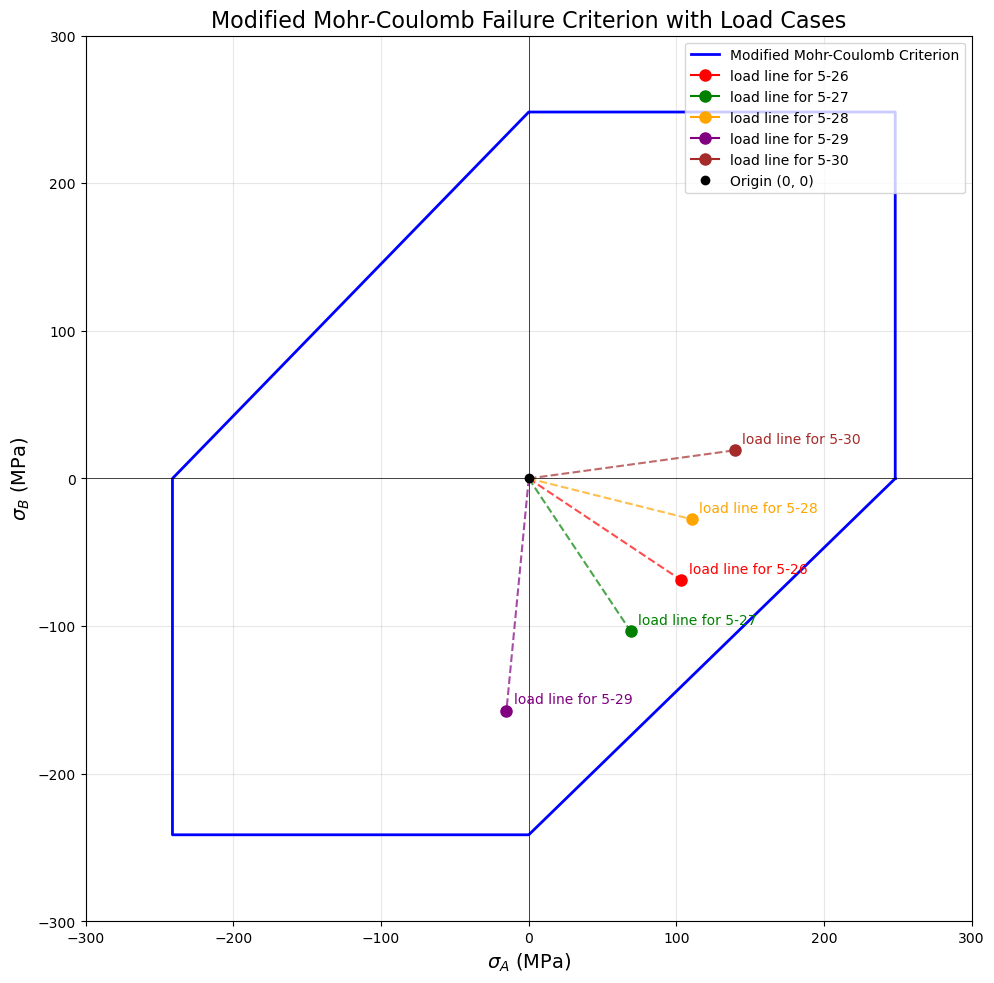

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
S_ut = 248.22  # ultimate tensile strength in MPa
S_uc = 241.325  # ultimate compressive strength in MPa

# define points
A = (S_ut, 0)
B = (0, -S_uc)
C = (-S_uc, -S_uc)
D = (-S_uc, 0)
E = (0, S_ut)
F = (S_ut, S_ut)
sigma_A = np.array([A[0], B[0], C[0], D[0], E[0], F[0], A[0]])
sigma_B = np.array([A[1], B[1], C[1], D[1], E[1], F[1], A[1]])

# 5 load cases
load_cases = [
    (103.425, -68.95),
    (68.95, -103.425),
    (110.32, -27.58),
    (-15.106, -157.2595),
    (139.505, 19.0845)
]

problem_labels = ["5-26", "5-27", "5-28", "5-29", "5-30"]
# Create the plot
plt.figure(figsize=(10, 10))

# 绘制MSS准则边界
plt.plot(sigma_A, sigma_B, 'b-', linewidth=2, label='Modified Mohr-Coulomb Criterion')

# 绘制加载点和加载线
colors = ['red', 'green', 'orange', 'purple', 'brown']
markers = ['o', 'o', 'o', 'o', 'o']

for i, case in enumerate(load_cases):
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    
    plt.plot(case[0], case[1], marker=marker, color=color, markersize=8, 
             label=f'load line for {problem_labels[i]}')
    
    plt.plot([0, case[0]], [0, case[1]], color=color, linestyle='--', linewidth=1.5, alpha=0.7)
    plt.text(case[0]+5, case[1]+5, f'load line for {problem_labels[i]}', fontsize=10, color=color)

plt.plot(0, 0, 'ko', markersize=6, label='Origin (0, 0)')
plt.xlim(-300, 300)
plt.ylim(-300, 300)
plt.xlabel('$\sigma_A$ (MPa)', fontsize=14)
plt.ylabel('$\sigma_B$ (MPa)', fontsize=14)
plt.title('Modified Mohr-Coulomb Failure Criterion with Load Cases', fontsize=16)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend(loc='upper right', fontsize=10)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()